In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
s=pd.read_csv("Social_Network_Ads.csv")
s.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


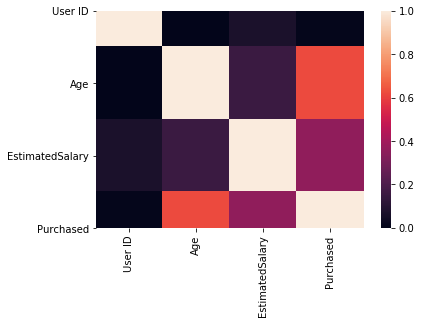

In [3]:
import seaborn as sb
corr = s.corr()
sb.heatmap(corr, vmax=1., square=False)

In [10]:
s_x=pd.DataFrame(s.iloc[:,[False,False,True,True,False]])
s_x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
s_y=pd.DataFrame(s.iloc[:,-1])
s_y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(s_x, s_y, test_size=0.3)

from sklearn.linear_model import LinearRegression


regression=LinearRegression()
regression.fit(X_train, Y_train)



Y_pred_lin=regression.predict(X_test)

Y_pred_lin
Y_pred_df=pd.DataFrame(Y_pred_lin, columns=["Predicted"])

In [32]:
Y_test.head()

,Purchased
72,0
349,0
74,0
382,1
316,1


In [33]:
Y_pred_df.head()

,Predicted
0,-0.280421
1,0.342448
2,0.035592
3,0.763802
4,0.926279


In [35]:
from sklearn.tree import DecisionTreeRegressor 
tree_regressor=DecisionTreeRegressor()
tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
Y_pred_tree=tree_regressor.predict(X_test)
Y_tree_pred_df=pd.DataFrame(Y_pred_tree, columns=["Predicted"])
Y_tree_pred_df.head()

,Predicted
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [38]:
sum_of_error_dt=0
Y_test_df=Y_test.reset_index().iloc[:,1:2]
Y_test_df.index

for i in Y_tree_pred_df.index:
    sum_of_error_dt=sum_of_error_dt+((Y_tree_pred_df.loc[i]["Predicted"]-Y_test_df.loc[i]["Purchased"])**2)
print(sum_of_error_dt)

17.0


In [40]:
sum_of_error_lr=0
for i in Y_pred_df.index:
    sum_of_error_lr=sum_of_error_lr+((Y_pred_df.loc[i]["Predicted"]-Y_test_df.loc[i]["Purchased"])**2)
print(sum_of_error_lr)


16.036747388587358


In [41]:
if(sum_of_error_dt>sum_of_error_lr):
    print("Linear Regression Is Better")
else:
    print("Decision Tree Is Better")

Linear Regression Is Better
